In [12]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load and show dataset
campaign = pd.read_csv('campaign_table.csv')
campaign.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [14]:
# Load and show dataset
coupon_redempt = pd.read_csv('coupon_redempt.csv')
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [15]:
# Load and show dataset
campaign_desc = pd.read_csv('campaign_desc.csv')
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [16]:
# Load and show dataset
hh_demographic = pd.read_csv('hb_demographic.csv')
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [17]:
#merge tables coupon_redempt and hh_demographic using household key to household key colun relationship
merge2 = pd.merge(
                     coupon_redempt, 
                     hh_demographic, 
                     left_on = 'household_key',
                     right_on = 'household_key',
                     how = "inner"
                    )

In [18]:
#show new merged dataframe and name it as merge2
merge2

,household_key,DAY,COUPON_UPC,CAMPAIGN,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,1,421,51700010076,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,1,427,54200000033,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,1,597,10000085476,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,1,597,54200029176,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...
1851,2496,592,52100023024,18,45-54,A,75-99K,Homeowner,Unknown,3,1
1852,2496,592,53010010033,18,45-54,A,75-99K,Homeowner,Unknown,3,1
1853,2496,592,54133500050,18,45-54,A,75-99K,Homeowner,Unknown,3,1
1854,2496,592,54900050076,18,45-54,A,75-99K,Homeowner,Unknown,3,1


In [19]:
#merge tables campaign_desc and merge2 using CAMPAIGN to CAMPAIGN  column relationship
merge3 = pd.merge(
                     campaign_desc, 
                     merge2, 
                     left_on = 'CAMPAIGN',
                     right_on = 'CAMPAIGN',
                     how = "inner"
                    )

In [20]:
#show new merged dataframe and name it as merge3
merge3

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,household_key,DAY,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,Homeowner,2 Adults Kids,5+,3+
1,TypeB,24,659,719,1453,662,10000085496,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
2,TypeB,24,659,719,1453,678,10000085495,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
3,TypeB,24,659,719,1627,679,10000085495,25-34,U,35-49K,Unknown,Single Male,1,None/Unknown
4,TypeB,24,659,719,1823,670,10000085495,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,TypeA,26,224,264,2280,225,57008510075,35-44,U,15-24K,Homeowner,2 Adults Kids,3,1
1852,TypeA,26,224,264,2280,241,53400022076,35-44,U,15-24K,Homeowner,2 Adults Kids,3,1
1853,TypeA,26,224,264,2305,237,57143030076,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
1854,TypeA,26,224,264,2305,237,57756765876,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown


In [21]:
# Load and show dataset
product = pd.read_csv('product.csv')
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [22]:
# Load and show dataset
transaction_data = pd.read_csv('transaction_data.csv')
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [23]:
#merge tables product and transaction_data using PRODUCT_ID to PRODUCT_ID column relationship
product_transaction =pd.merge(
                     product, 
                     transaction_data, 
                     left_on = 'PRODUCT_ID',
                     right_on = 'PRODUCT_ID',
                     how = "inner"
                    )

In [24]:
product_transaction

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,1228,29046618323,157,1,3.49,3313,0.00,2213,23,0.0,0.0
1,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,358,30707611686,247,1,3.49,3266,0.00,1211,36,0.0,0.0
2,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,1675,30760265177,250,1,0.99,3235,0.00,936,36,0.0,0.0
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,1420,30591251330,238,1,1.54,3297,0.00,1342,35,0.0,0.0
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ,486,30636771192,242,2,1.98,3217,-0.52,1411,35,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13511722,1208,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OUNCE,2226,31869178332,328,2,1.00,369,-1.58,1518,48,0.0,0.0
1048571,13511722,1208,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OUNCE,1795,31883460025,329,1,0.50,31782,-0.79,209,48,0.0,0.0
1048572,13511722,1208,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OUNCE,1795,31883463528,329,1,0.50,31782,-0.79,2201,48,0.0,0.0
1048573,13511722,1208,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OUNCE,1495,31883486986,329,2,1.00,31642,-1.58,1551,48,0.0,0.0


In [25]:
#make a final dataframe for analysis by merging merge3 and product_transaction dataframes using household_key to household_key relationship 
merge = pd.merge(
                     merge3, 
                     product_transaction, 
                     left_on = 'household_key',
                     right_on = 'household_key',
                     how = "inner"
                    )

In [26]:
#add a calculated column of Total Sales which will be a product of QUANTITY AND SALES_VALUE columns
merge['Total Sales'] = merge['SALES_VALUE'] * merge['QUANTITY']

In [27]:
#add a calculated column of total compaign days by substracting END_DAY from START_DAY
merge['Total Compaign Days'] = merge['END_DAY']-merge['START_DAY']

In [28]:
#Show final dataframe and name it merge
merge

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,household_key,DAY_x,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,...,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Total Sales,Total Compaign Days
0,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,...,1,0.99,3027,0.00,1850,35,0.0,0.0,0.99,60
1,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,...,1,0.89,3027,-0.10,1850,35,0.0,0.0,0.89,60
2,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,...,1,1.67,3027,-0.48,1908,33,0.0,0.0,1.67,60
3,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,...,1,1.19,3027,0.00,1908,33,0.0,0.0,1.19,60
4,TypeB,24,659,719,840,671,10000085495,35-44,A,75-99K,...,1,1.19,3027,0.00,1850,35,0.0,0.0,1.19,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868286,TypeA,26,224,264,2111,244,55410000076,45-54,U,75-99K,...,1,2.00,403,0.00,1537,43,0.0,0.0,2.00,40
1868287,TypeA,26,224,264,2111,244,55410000076,45-54,U,75-99K,...,1,2.00,403,-5.99,1537,43,0.0,0.0,2.00,40
1868288,TypeA,26,224,264,2111,244,55410000076,45-54,U,75-99K,...,2,2.50,321,-0.76,1658,47,0.0,0.0,5.00,40
1868289,TypeA,26,224,264,2111,244,55410000076,45-54,U,75-99K,...,1,0.85,403,-0.38,1327,47,-0.4,-0.4,0.85,40


# Distribution Analysis of Demographics

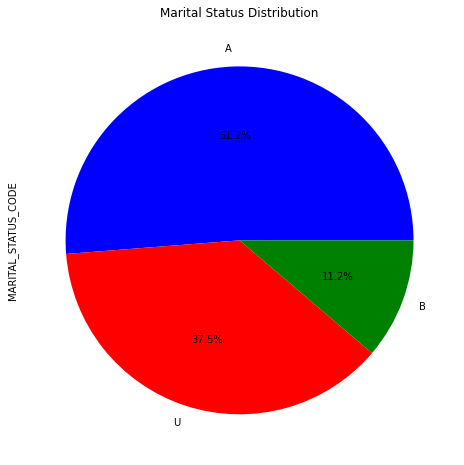

In [20]:
#lets plot a pie chart using matplotlib for the distribution of marital status code
merge['MARITAL_STATUS_CODE'].value_counts().plot(kind='pie',title='Marital Status Distribution', autopct ='%1.1f%%',
                                             colors=['blue','red','green'] ,figsize=(14,8))
plt.show()

In [21]:
#calculate count of AGE_DESC
Age_distribution = merge['AGE_DESC'].value_counts(ascending=False)
Age_distribution

45-54    775509
35-44    480805
25-34    379056
55-64    118507
65+       81221
19-24     33193
Name: AGE_DESC, dtype: int64

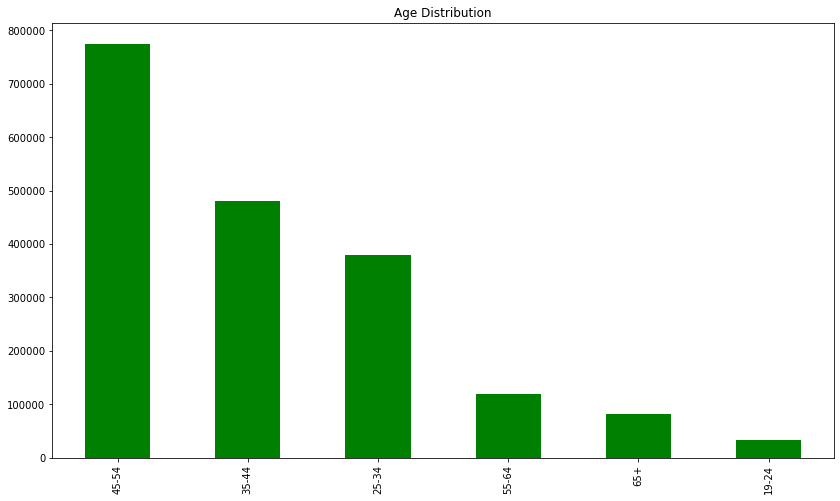

In [22]:
#Show AGE_DESC count using bar plot and name it Age distribution
Age_distribution.plot(kind='bar',title='Age Distribution',figsize=(14,8), color= 'green')
plt.show()

In [23]:
#calculate count of INCOME_DESC
INCOME_DESC = merge['INCOME_DESC'].value_counts(ascending=False)
INCOME_DESC

50-74K       640221
35-49K       261579
75-99K       233922
150-174K     148639
125-149K     147995
25-34K       143172
Under 15K    141620
15-24K        70255
100-124K      38514
175-199K      33719
250K+          5479
200-249K       3176
Name: INCOME_DESC, dtype: int64

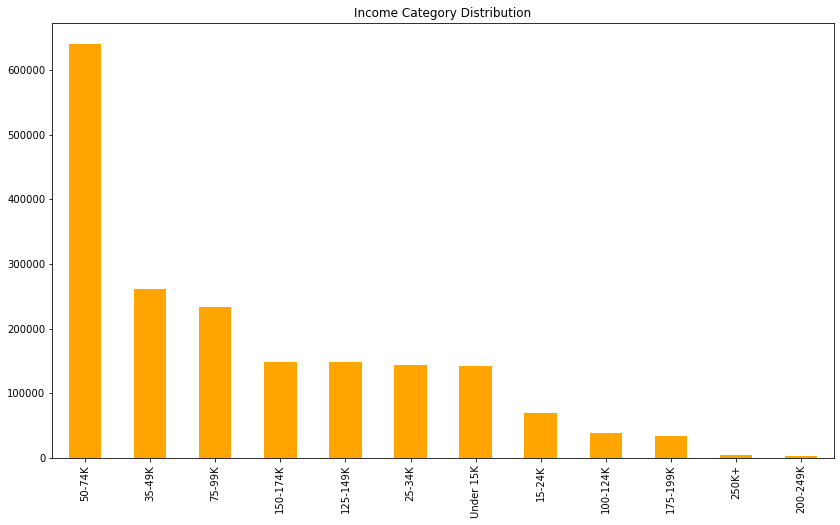

In [24]:
#Show INCOME_DESC count using bar plot and name it Income Category Distribution
INCOME_DESC.plot(kind='bar',title='Income Category Distribution',figsize=(14,8), color= 'orange')
plt.show()

In [33]:
#calculate count of HOUSEHOLD_SIZE_DESC
HOUSEHOLD_SIZE_DESC = merge['HOUSEHOLD_SIZE_DESC'].value_counts(ascending=False)
HOUSEHOLD_SIZE_DESC

2     691703
1     467331
3     294253
4     228389
5+    186615
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

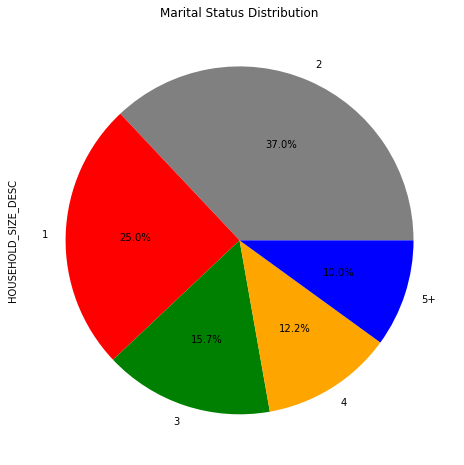

In [32]:
#lets plot a pie chart using matplotlib for the distribution of HOUSEHOLD_SIZE_DESC
merge['HOUSEHOLD_SIZE_DESC'].value_counts().plot(kind='pie',title='Marital Status Distribution', autopct ='%1.1f%%',
                                             colors=['grey','red','green','orange','blue'] ,figsize=(14,8))
plt.show()

# Regression Analysis of the affect of comapign on overall engagement

In [27]:
#show columns of dataset for reference
merge.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'household_key',
       'DAY_x', 'COUPON_UPC', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'BASKET_ID', 'DAY_y', 'QUANTITY', 'SALES_VALUE', 'STORE_ID',
       'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC',
       'COUPON_MATCH_DISC', 'Total Sales', 'Total Compaign Days'],
      dtype='object')

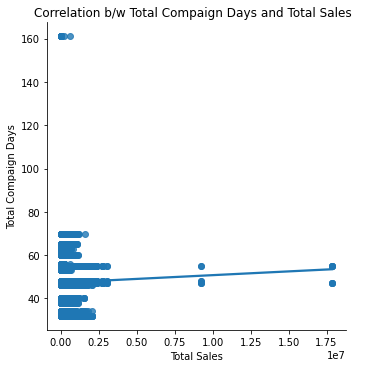

In [28]:
# Correlation b/w Total Compaign Days and Total Sales using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge,ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales  ')

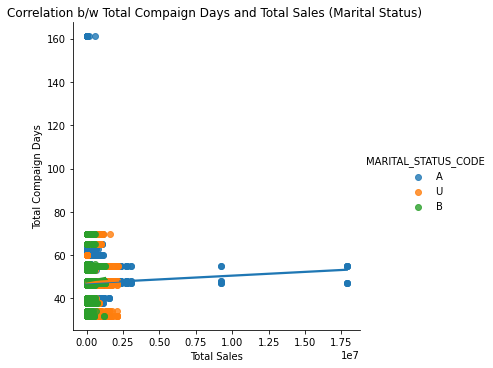

In [29]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (Marital Status) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'MARITAL_STATUS_CODE',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (Marital Status) ')

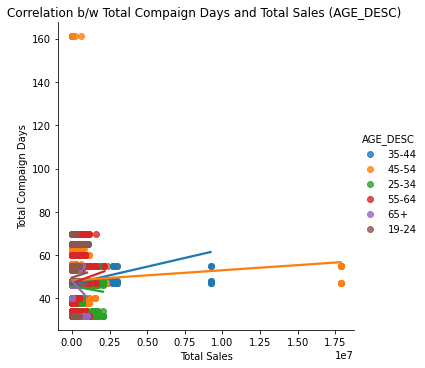

In [30]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (AGE_DESC) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'AGE_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (AGE_DESC) ')

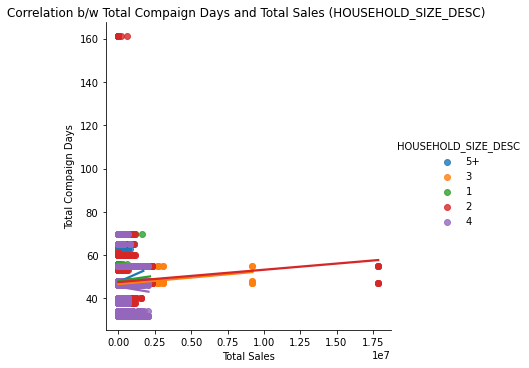

In [31]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (HOUSEHOLD_SIZE_DESC) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'HOUSEHOLD_SIZE_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (HOUSEHOLD_SIZE_DESC) ')

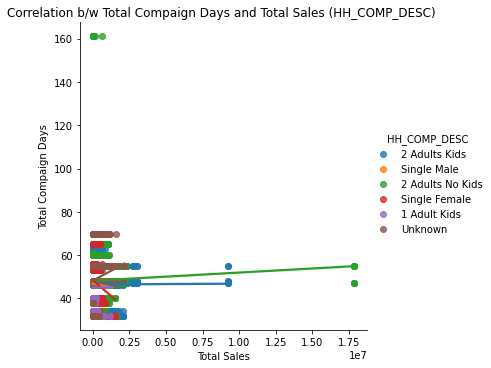

In [32]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (HH_COMP_DESC) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'HH_COMP_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (HH_COMP_DESC) ')

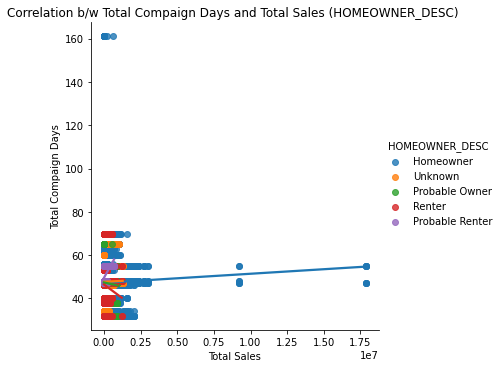

In [33]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (HOMEOWNER_DESC) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'HOMEOWNER_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (HOMEOWNER_DESC) ')

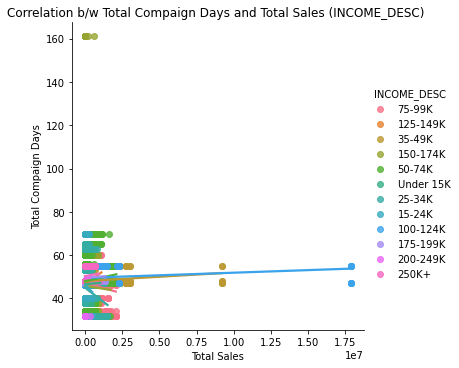

In [34]:
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'INCOME_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (INCOME_DESC) ')

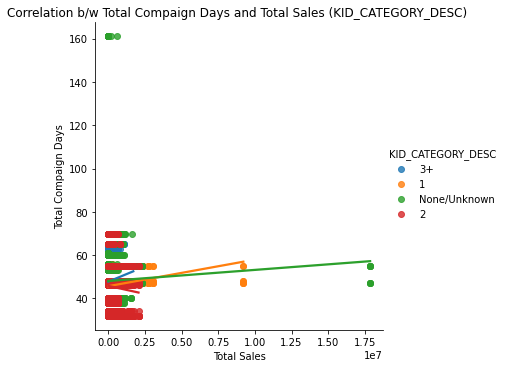

In [35]:
# Correlation b/w Correlation b/w Total Compaign Days and Total Sales (KID_CATEGORY_DESC) using seaborn lmplot
ax = sns.lmplot(x='Total Sales', y='Total Compaign Days', 
data = merge, hue = 'KID_CATEGORY_DESC',ci=None).set(title='Correlation b/w Total Compaign Days and Total Sales (KID_CATEGORY_DESC) ')

# Analysis of Effect of Demographics on Sales

,Total Sales
MARITAL_STATUS_CODE,
A,4.386250e+09
B,4.203397e+08
U,3.868096e+09


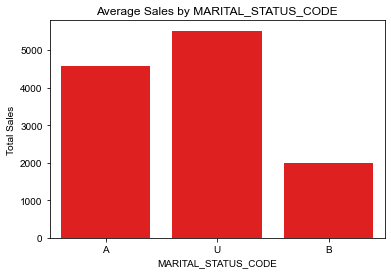

In [34]:
#Sales by MARITAL_STATUS_CODE by using seaborn barplot
ax = sns.barplot(x='MARITAL_STATUS_CODE', y='Total Sales', data =merge,ci=None,color='red').set(title='Average Sales by MARITAL_STATUS_CODE')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','MARITAL_STATUS_CODE']].groupby('MARITAL_STATUS_CODE').agg({'Total Sales':'sum'})

,Total Sales
AGE_DESC,
19-24,1.184499e+08
25-34,2.304303e+09
35-44,2.322996e+09
45-54,3.160474e+09
55-64,6.386807e+08
65+,1.297819e+08


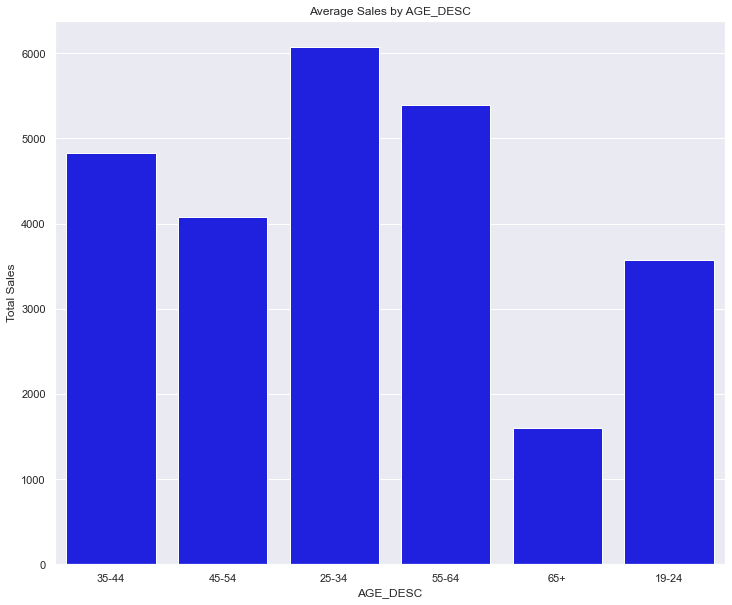

In [35]:
#Sales by AGE_DES by using seaborn barplot
ax = sns.barplot(x='AGE_DESC', y='Total Sales', data =merge,ci=None,color='blue').set(title='Average Sales by AGE_DESC')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','AGE_DESC']].groupby('AGE_DESC').agg({'Total Sales':'sum'})

,Total Sales
HOUSEHOLD_SIZE_DESC,
1,2.336810e+09
2,2.432299e+09
3,1.108868e+09
4,1.984803e+09
5+,8.119059e+08


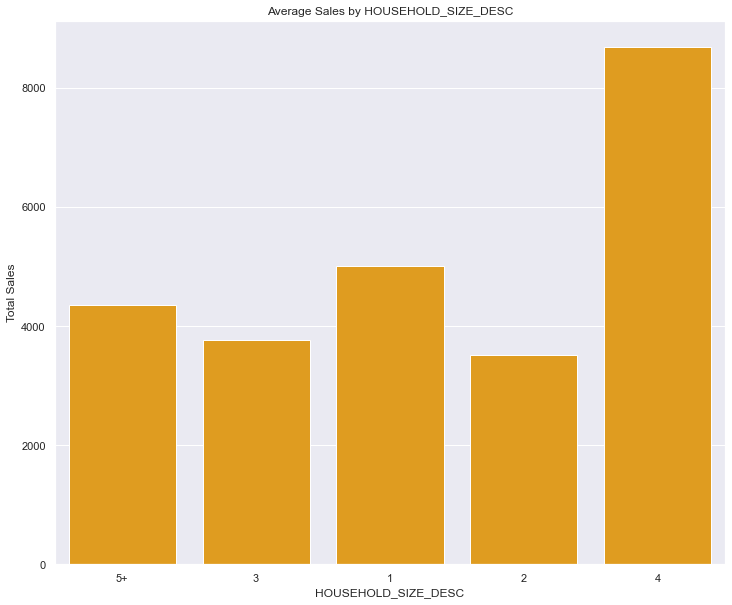

In [36]:
#Sales by AGE_DES by using seaborn barplot HOUSEHOLD_SIZE_DESC
ax = sns.barplot(x='HOUSEHOLD_SIZE_DESC', y='Total Sales', data =merge,ci=None,color='orange').set(title='Average Sales by HOUSEHOLD_SIZE_DESC')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','HOUSEHOLD_SIZE_DESC']].groupby('HOUSEHOLD_SIZE_DESC').agg({'Total Sales':'sum'})

,Total Sales
HH_COMP_DESC,
1 Adult Kids,2.235504e+08
2 Adults Kids,3.729227e+09
2 Adults No Kids,2.226573e+09
Single Female,6.627939e+08
Single Male,6.168537e+08
Unknown,1.215687e+09


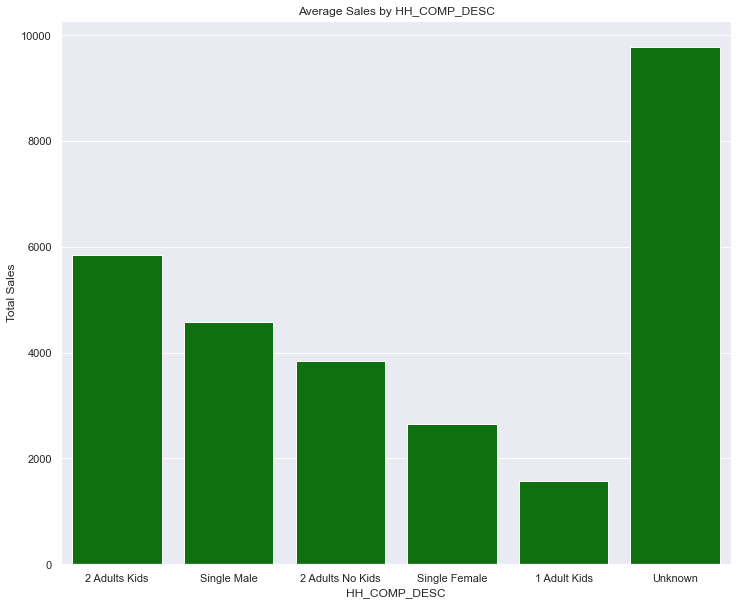

In [37]:
#Sales by HH_COMP_DESC by using seaborn barplot 
ax = sns.barplot(x='HH_COMP_DESC', y='Total Sales', data =merge,ci=None,color='green').set(title='Average Sales by HH_COMP_DESC')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','HH_COMP_DESC']].groupby('HH_COMP_DESC').agg({'Total Sales':'sum'})

,Total Sales
INCOME_DESC,
100-124K,3.492287e+08
125-149K,6.613131e+08
15-24K,5.258432e+07
150-174K,6.845416e+08
175-199K,2.399550e+08
200-249K,1.463170e+06
25-34K,3.857833e+08
250K+,7.986834e+06
35-49K,9.621190e+08


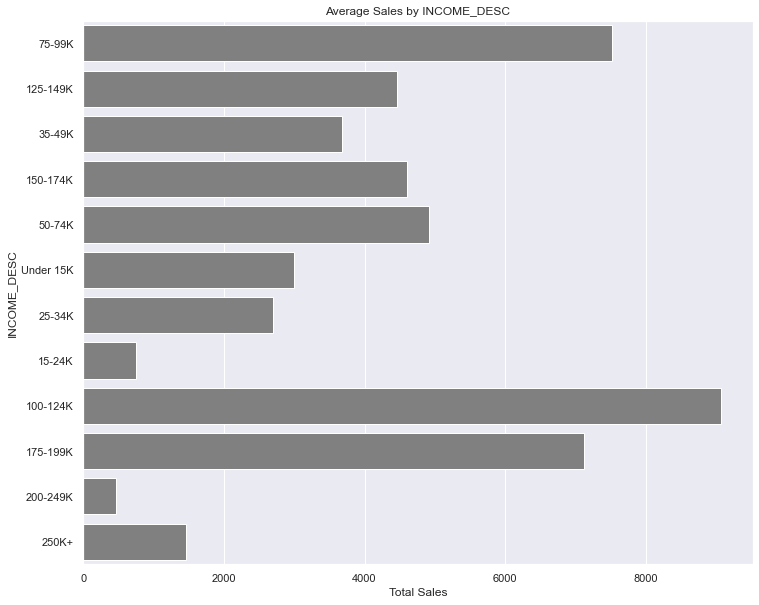

In [39]:
#Sales by INCOME_DESC by using seaborn barplot 
ax = sns.barplot(x='Total Sales', y='INCOME_DESC', data =merge,ci=None,color='grey').set(title='Average Sales by INCOME_DESC')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','INCOME_DESC']].groupby('INCOME_DESC').agg({'Total Sales':'sum'})

,Total Sales
KID_CATEGORY_DESC,
1,1.125138e+09
2,2.036182e+09
3+,8.119916e+08
None/Unknown,4.701375e+09


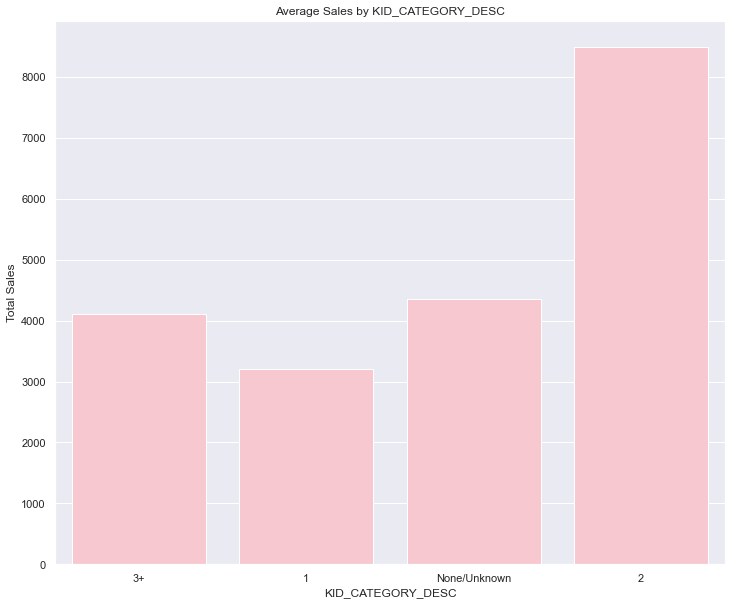

In [40]:
#Sales by KID_CATEGORY_DESC by using seaborn barplot 
ax = sns.barplot(x='KID_CATEGORY_DESC', y='Total Sales', data =merge,ci=None,color='pink').set(title='Average Sales by KID_CATEGORY_DESC')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','KID_CATEGORY_DESC']].groupby('KID_CATEGORY_DESC').agg({'Total Sales':'sum'})

# Sales Trend By CAMPAIGN

,Total Sales
CAMPAIGN,
2,2581.069509
3,1735.668110
4,7539.573700
5,5750.964301
6,3.393372
7,5711.138827
8,3809.812415
9,2443.901291
10,5277.765144


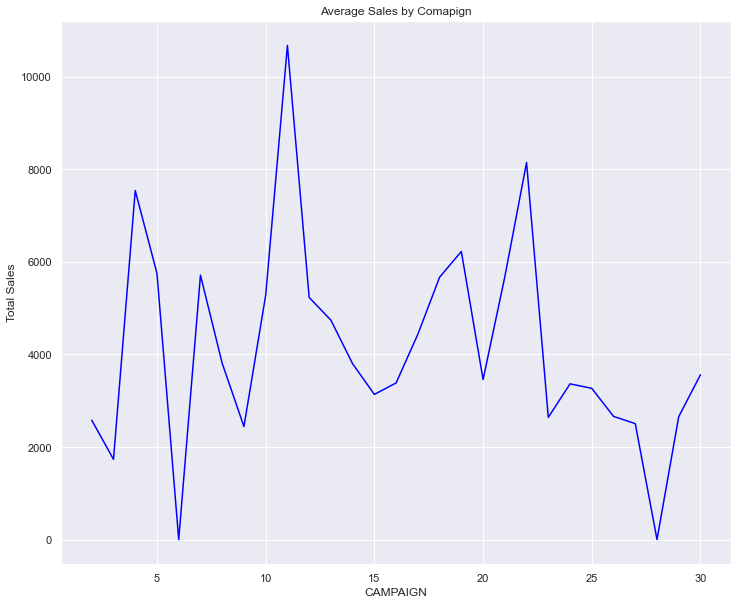

In [48]:
#Average Sales by Comapign using seaborn line plot
ax = sns.lineplot(x='CAMPAIGN', y='Total Sales', 
data =merge,ci=None ,color='blue').set(title='Average Sales by Comapign')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','CAMPAIGN']].groupby('CAMPAIGN').agg({'Total Sales':'mean'})

# Weekly Trend of Sales 

,Total Sales
WEEK_NO,
1,3.237685
2,3.547997
3,3.287290
4,267.919759
5,182.828185
6,236.073281
7,909.457088
8,492.144253
9,2234.107616


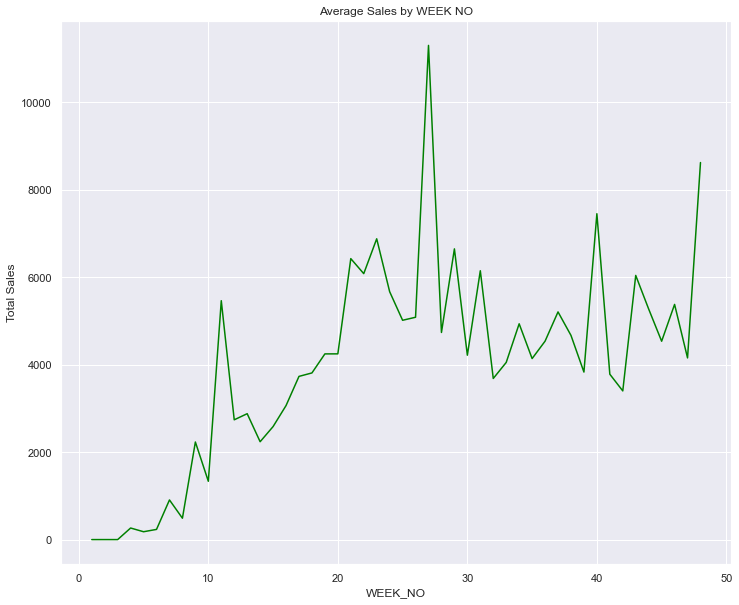

In [51]:
#Average Sales by WEEK NO using seaborn line plot
ax = sns.lineplot(x='WEEK_NO', y='Total Sales', 
data =merge,ci=None ,color='green').set(title='Average Sales by WEEK NO')
sns.set(rc={'figure.figsize':(12,10)})
merge[['Total Sales','WEEK_NO']].groupby('WEEK_NO').agg({'Total Sales':'mean'})